In [2]:
import pandas as pd
import stylia
from stylia import TWO_COLUMNS_WIDTH
import matplotlib.pyplot as plt
from stylia.colors.colors import NamedColors

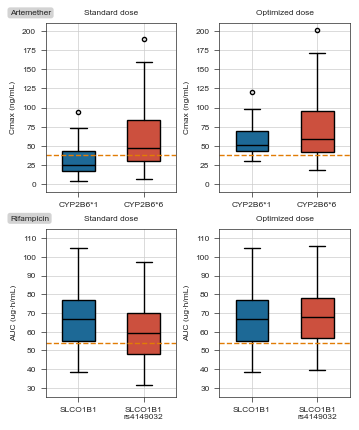

In [37]:
def boxplot(ax, df, title, cats = None, ylim = None, target = None):
    colors = [NamedColors().blue, NamedColors().red]
    columns = list(df.columns)[1:]
    ylabel = columns[0]
    xlabel = columns[1]
    if cats is None:
        cats = []
        for c in df[xlabel].tolist():
            if c not in cats:
                cats += [c]
    flierprops = dict(marker='o', color='black', markersize=3)
    medianprops = dict(color='black', linewidth=1)
    boxes = ax.boxplot([df[df[xlabel] == c][ylabel] for c in cats], tick_labels=[c.replace(" ", "\n") for c in cats], patch_artist=True, widths=0.5, flierprops=flierprops, medianprops=medianprops)
    for i, box in enumerate(boxes['boxes']):
        box.set(linewidth=1)
        box.set(facecolor=colors[i])
    if ylim is not None:
        ax.set_ylim(ylim)
    if target is not None:
        ax.axhline(y=target, color=NamedColors().orange, linestyle='--', lw=1)
    stylia.label(ax, xlabel="", ylabel=ylabel.replace(".", "·"), title=title)

fig, axs = stylia.create_figure(2, 2, width=TWO_COLUMNS_WIDTH*0.5, height=TWO_COLUMNS_WIDTH*0.6)

file_name = "data/pbpk/Artemether box plots.xlsx"

ds = pd.read_excel(file_name, sheet_name="Artemether_standard dose")
do = pd.read_excel(file_name, sheet_name="Artemether_optimized dose")

ax = axs.next()
boxplot(ax, ds, title="Standard dose", cats=["CYP2B6*1", "CYP2B6*6"], ylim=[-10, 210], target=38.6)

ax = axs.next()
boxplot(ax, do, "Optimized dose", cats=["CYP2B6*1", "CYP2B6*6"], ylim = [-10, 210], target=38.6)

file_name = "data/pbpk/Rifampicin_boxplot_data.xlsx"

ds = pd.read_excel(file_name, sheet_name="Rifampicin_standard_dose")
do = pd.read_excel(file_name, sheet_name="Rifampicin_optimized_dose")

ax = axs.next()
boxplot(ax, ds, title="Standard dose", cats=["SLCO1B1", "SLCO1B1 rs4149032"], ylim=[25, 115], target=54.2)

ax = axs.next()
boxplot(ax, do, title="Optimized dose", cats=["SLCO1B1", "SLCO1B1 rs4149032"], ylim=[25, 115], target=54.2)

bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey", linewidth=0)
fig.text(0.02, 0.97, "Artemether", ha='left', fontsize=6, bbox=bbox_props)
fig.text(0.02, 0.487, "Rifampicin", ha='left', fontsize=6, bbox=bbox_props)

plt.tight_layout()

stylia.save_figure("assets/artermether_rifampicin_boxplots.png")
stylia.save_figure("assets/artermether_rifampicin_boxplots.pdf")

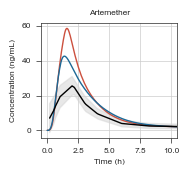

In [36]:
import numpy as np
from scipy.interpolate import interp1d

file_name = "data/pbpk/artemether_curve.xlsx"
art = pd.read_excel(file_name, sheet_name="Clinical data")
art_ = pd.read_excel(file_name, sheet_name="PBPK Predictions")
art_abcb1= art_[art_["Transporter"]=="ABCB1"]
art_noabcb1 = art_[art_["Transporter"]=="No ABCB1"]

art1 = art[art["Study number"]==1]
art2 = art[art["Study number"]==2]
art3 = art[art["Study number"]==3]

x1, y1 = art1["Time (h)"].tolist(), art1["Conc (ng/mL)"].tolist()
x2, y2 = art2["Time (h)"].tolist(), art2["Conc (ng/mL)"].tolist()
x3, y3 = art3["Time (h)"].tolist(), art3["Conc (ng/mL)"].tolist()

common_time_points = sorted(set(x1 + x2 + x3))

interp1 = interp1d(x1, y1, kind='linear', fill_value="extrapolate")
interp2 = interp1d(x2, y2, kind='linear', fill_value="extrapolate")
interp3 = interp1d(x3, y3, kind='linear', fill_value="extrapolate")

y1_interp = interp1(common_time_points)
y2_interp = interp2(common_time_points)
y3_interp = interp3(common_time_points)

y1_interp = np.clip(y1_interp, 0, None)
y2_interp = np.clip(y2_interp, 0, None)
y3_interp = np.clip(y3_interp, 0, None)

y_values_interp = np.vstack([y1_interp, y2_interp, y3_interp])
mean_y = np.mean(y_values_interp, axis=0)
std_y = np.std(y_values_interp, axis=0)

fig, axs = stylia.create_figure(1, 1, width=TWO_COLUMNS_WIDTH*0.4/2*1.2, height=TWO_COLUMNS_WIDTH*0.2*1.1)
ax = axs.next()
ax.plot(common_time_points, mean_y, color=NamedColors().black, label="Literature", zorder=1000, lw = 1)
ax.fill_between(common_time_points, mean_y - std_y, mean_y + std_y, color=NamedColors().gray, alpha=0.5, label="±1 STD")
ax.set_xlim(-0.5,10.5)
x = art_abcb1["Time (h)"].tolist()
y = art_abcb1["Conc (ng/mL)"].tolist()
ax.plot(x, y, color=NamedColors().red, label = "ABCB1", lw = 1)
x = art_noabcb1["Time (h)"].tolist()
y = art_noabcb1["Conc (ng/mL)"].tolist()
ax.plot(x, y, color=NamedColors().blue, label = "NO ABCB1", lw = 1)
stylia.label(ax, xlabel="Time (h)", ylabel="Concentration (ng/mL)", title="Artemether")
plt.tight_layout()
stylia.save_figure("assets/pbpk_artemether_fits.png")
stylia.save_figure("assets/pbpk_artemether_fits.pdf")

Index(['Time (h)', 'Conc (mg/L)', 'sd'], dtype='object') Index(['Time (h)', 'Conc (ng/mL)', 'Study number'], dtype='object')


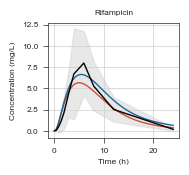

In [37]:
fig, axs = stylia.create_figure(1, 1, width=TWO_COLUMNS_WIDTH*0.4/2*1.2, height=TWO_COLUMNS_WIDTH*0.2*1.1)

file_name = "data/pbpk/rifampicin_curve.xlsx"
rif = pd.read_excel(file_name, sheet_name="Rifampicin Clinical data")
rif_= pd.read_excel(file_name, sheet_name="Rifampicin predictions")
rif_abcb1 = rif_[rif_["Transporter"]=="ABCB1"]
rif_noabcb1 = rif_[rif_["Transporter"]=="No ABCB1"]

print(rif.columns, art.columns)
ax = axs.next()
#ax.plot(x, y, color=NamedColors().orange)
x = rif_abcb1["Time (h)"].tolist()
y = rif_abcb1["Conc (mg/L)"].tolist()
#ax.scatter(x, y, color=NamedColors().green, zorder=1000)
ax.plot(x, y, color=NamedColors().red, lw=1)
x = rif_noabcb1["Time (h)"].tolist()
y = rif_noabcb1["Conc (mg/L)"].tolist()
#ax.scatter(x, y, color=NamedColors().purple, zorder=1000)
ax.plot(x, y, color=NamedColors().blue, lw=1)

x = rif["Time (h)"].tolist()
y = np.array(rif["Conc (mg/L)"].tolist())
s = np.array(rif["sd"])
ax.plot(x, y, color=NamedColors().black, zorder=1000, lw=1)
ax.fill_between(x, y - s, y + s, color=NamedColors().gray, alpha=0.5, label="±1 STD")

stylia.label(ax, xlabel="Time (h)", ylabel="Concentration (mg/L)", title="Rifampicin")

plt.tight_layout()
stylia.save_figure("assets/pbpk_rifampicin_fits.png")
stylia.save_figure("assets/pbpk_rifampicin_fits.pdf")

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

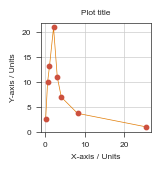

In [13]:
import numpy as np
from scipy.interpolate import interp1d

fig, axs = stylia.create_figure(1, 1, width=TWO_COLUMNS_WIDTH*0.4/2, height=TWO_COLUMNS_WIDTH*0.2)

file_name = "data/pbpk/artemether_curve.xlsx"
art = pd.read_excel(file_name, sheet_name="Clinical data")
art_ = pd.read_excel(file_name, sheet_name="PBPK Predictions")
art_abcb1= art_[art_["Transporter"]=="ABCB1"]
art_noabcb1 = art_[art_["Transporter"]=="No ABCB1"]

ax = axs.next()
art = art[art["Study number"]==1]
x = art["Time (h)"].tolist()
y = art["Conc (ng/mL)"].tolist()
ax.scatter(x, y, color=NamedColors().red, zorder=1000)
ax.plot(x, y, color=NamedColors().orange)

art1 = art[art["Study number"]==1]
x1 = art1["Time (h)"].tolist()
y1 = art1["Conc (ng/mL)"].tolist()
art2 = art[art["Study number"]==2]
x2 = art2["Time (h)"].tolist()
y2 = art2["Conc (ng/mL)"].tolist()
art3 = art[art["Study number"]==3]
x3 = art3["Time (h)"].tolist()
y3 = art3["Conc (ng/mL)"].tolist()

x1, y1 = art1["Time (h)"].tolist(), art1["Conc (ng/mL)"].tolist()
x2, y2 = art2["Time (h)"].tolist(), art2["Conc (ng/mL)"].tolist()
x3, y3 = art3["Time (h)"].tolist(), art3["Conc (ng/mL)"].tolist()

common_time_points = sorted(set(x1 + x2 + x3))

interp1 = interp1d(x1, y1, kind='linear', fill_value="extrapolate")
interp2 = interp1d(x2, y2, kind='linear', fill_value="extrapolate")
interp3 = interp1d(x3, y3, kind='linear', fill_value="extrapolate")

y1_interp = interp1(common_time_points)
y2_interp = interp2(common_time_points)
y3_interp = interp3(common_time_points)

y1_interp = np.clip(y1_interp, 0, None)
y2_interp = np.clip(y2_interp, 0, None)
y3_interp = np.clip(y3_interp, 0, None)

y_values_interp = np.vstack([y1_interp, y2_interp, y3_interp])
mean_y = np.mean(y_values_interp, axis=0)
std_y = np.std(y_values_interp, axis=0)





x = art_abcb1["Time (h)"].tolist()
y = art_abcb1["Conc (ng/mL)"].tolist()
ax.plot(x, y, color=NamedColors().red, lw=1)
x = art_noabcb1["Time (h)"].tolist()
y = art_noabcb1["Conc (ng/mL)"].tolist()
ax.plot(x, y, color=NamedColors().blue, lw=1)
stylia.label(ax, xlabel="Time (h)", ylabel="Concentration (ng/mL)", title="Artemether")

plt.tight_layout()
stylia.save_figure("assets/pbpk_artemether_fits.png")
stylia.save_figure("assets/pbpk_artemether_fits.pdf")

fig, axs = stylia.create_figure(1, 1, width=TWO_COLUMNS_WIDTH*0.4/2, height=TWO_COLUMNS_WIDTH*0.2)

file_name = "data/pbpk/rifampicin_curve.xlsx"
rif = pd.read_excel(file_name, sheet_name="Rifampicin Clinical data")
rif_= pd.read_excel(file_name, sheet_name="Rifampicin predictions")
rif_abcb1 = rif_[rif_["Transporter"]=="ABCB1"]
rif_noabcb1 = rif_[rif_["Transporter"]=="No ABCB1"]

print(rif.columns, art.columns)
ax = axs.next()
x = rif["Time (h)"].tolist()
y = rif["Conc (mg/L)"].tolist()
ax.scatter(x, y, color=NamedColors().blue, zorder=1000)
#ax.plot(x, y, color=NamedColors().orange)
x = rif_abcb1["Time (h)"].tolist()
y = rif_abcb1["Conc (mg/L)"].tolist()
#ax.scatter(x, y, color=NamedColors().green, zorder=1000)
ax.plot(x, y, color=NamedColors().red, lw=1)
x = rif_noabcb1["Time (h)"].tolist()
y = rif_noabcb1["Conc (mg/L)"].tolist()
#ax.scatter(x, y, color=NamedColors().purple, zorder=1000)
ax.plot(x, y, color=NamedColors().blue, lw=1)
stylia.label(ax, xlabel="Time (h)", ylabel="Concentration (mg/L)", title="Rifampicin")

plt.tight_layout()
stylia.save_figure("assets/pbpk_rifampicin_fits.png")
stylia.save_figure("assets/pbpk_rifampicin_fits.pdf")


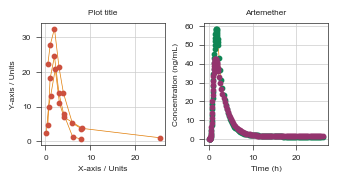

In [5]:
fig, axs = stylia.create_figure(1, 2, width=TWO_COLUMNS_WIDTH*0.47, height=TWO_COLUMNS_WIDTH*0.25)

file_name = "data/pbpk/artemether_curve.xlsx"
art = pd.read_excel(file_name, sheet_name="Clinical data")
art_ = pd.read_excel(file_name, sheet_name="PBPK Predictions")
art_abcb1= art_[art_["Transporter"]=="ABCB1"]
art_noabcb1 = art_[art_["Transporter"]=="No ABCB1"]

ax = axs.next()
art1 = art[art["Study number"]==1]
x1 = art1["Time (h)"].tolist()
y1 = art1["Conc (ng/mL)"].tolist()
art2 = art[art["Study number"]==2]
x2 = art2["Time (h)"].tolist()
y2 = art2["Conc (ng/mL)"].tolist()
art3 = art[art["Study number"]==3]
x3 = art3["Time (h)"].tolist()
y3 = art3["Conc (ng/mL)"].tolist()


ax.scatter(x1, y1, color=NamedColors().red, zorder=1000)
ax.scatter(x2, y2, color=NamedColors().red, zorder=1000)
ax.scatter(x3, y3, color=NamedColors().red, zorder=1000)
ax.plot(x1, y1, color=NamedColors().orange)
ax.plot(x2, y2, color=NamedColors().orange)
ax.plot(x3, y3, color=NamedColors().orange)
ax=axs.next()
x = art_abcb1["Time (h)"].tolist()
y = art_abcb1["Conc (ng/mL)"].tolist()
ax.scatter(x, y, color=NamedColors().green, zorder=1000)
ax.plot(x, y, color=NamedColors().orange)
x = art_noabcb1["Time (h)"].tolist()
y = art_noabcb1["Conc (ng/mL)"].tolist()
ax.scatter(x, y, color=NamedColors().purple, zorder=1000)
ax.plot(x, y, color=NamedColors().orange)
stylia.label(ax, xlabel="Time (h)", ylabel="Concentration (ng/mL)", title="Artemether")

plt.tight_layout()

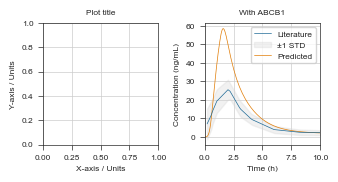

In [15]:
import numpy as np
from scipy.interpolate import interp1d
file_name = "data/pbpk/artemether_curve.xlsx"
art = pd.read_excel(file_name, sheet_name="Clinical data")
art_ = pd.read_excel(file_name, sheet_name="PBPK Predictions")
art_abcb1= art_[art_["Transporter"]=="ABCB1"]
art_noabcb1 = art_[art_["Transporter"]=="No ABCB1"]

art1 = art[art["Study number"]==1]
art2 = art[art["Study number"]==2]
art3 = art[art["Study number"]==3]

x1, y1 = art1["Time (h)"].tolist(), art1["Conc (ng/mL)"].tolist()
x2, y2 = art2["Time (h)"].tolist(), art2["Conc (ng/mL)"].tolist()
x3, y3 = art3["Time (h)"].tolist(), art3["Conc (ng/mL)"].tolist()

common_time_points = sorted(set(x1 + x2 + x3))

interp1 = interp1d(x1, y1, kind='linear', fill_value="extrapolate")
interp2 = interp1d(x2, y2, kind='linear', fill_value="extrapolate")
interp3 = interp1d(x3, y3, kind='linear', fill_value="extrapolate")

y1_interp = interp1(common_time_points)
y2_interp = interp2(common_time_points)
y3_interp = interp3(common_time_points)

y1_interp = np.clip(y1_interp, 0, None)
y2_interp = np.clip(y2_interp, 0, None)
y3_interp = np.clip(y3_interp, 0, None)

y_values_interp = np.vstack([y1_interp, y2_interp, y3_interp])
mean_y = np.mean(y_values_interp, axis=0)
std_y = np.std(y_values_interp, axis=0)

fig, axs = stylia.create_figure(1, 2, width=TWO_COLUMNS_WIDTH*0.47, height=TWO_COLUMNS_WIDTH*0.25)
ax = axs.next()

ax = axs.next()
ax.plot(common_time_points, mean_y, color=NamedColors().blue, label="Literature", zorder=1000, )
ax.fill_between(common_time_points, mean_y - std_y, mean_y + std_y, color=NamedColors().gray, alpha=0.3, label="±1 STD")
ax.set_xlim(0,10)
x = art_abcb1["Time (h)"].tolist()
y = art_abcb1["Conc (ng/mL)"].tolist()
ax.plot(x, y, color=NamedColors().orange,label = "Predicted")
stylia.label(ax, xlabel="Time (h)", ylabel="Concentration (ng/mL)", title="With ABCB1")
ax.legend()
plt.tight_layout()
#stylia.save_figure("assets/pbpk_artemether_fits.png")
#stylia.save_figure("assets/pbpk_artemether_fits.pdf")

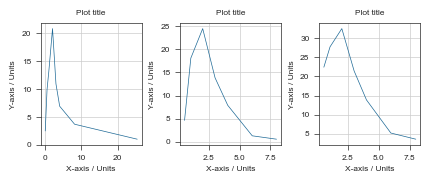

In [18]:

x2, y2 = art2["Time (h)"].tolist(), art2["Conc (ng/mL)"].tolist()
x3, y3 = art3["Time (h)"].tolist(), art3["Conc (ng/mL)"].tolist()
file_name = "data/pbpk/artemether_curve.xlsx"
art = pd.read_excel(file_name, sheet_name="Clinical data")

fig, axs = stylia.create_figure(1, 3, width=TWO_COLUMNS_WIDTH*0.6, height=TWO_COLUMNS_WIDTH*0.25)
for i in range(1,4):
    ax = axs.next()
    art_lit = art[art["Study number"]==i]
    x, y = art_lit["Time (h)"].tolist(), art_lit["Conc (ng/mL)"].tolist()
    ax.plot(x,y, color=NamedColors().blue, label="Literature", zorder=1000)
plt.tight_layout()